# An√°lise explorat√≥ria de survey sociodemogr√°fico

## Problema de pesquisa

Este dataset apresenta as respostas de um question√°rio aplicado com 1934 benefici√°rios do programa Y, com foco em integra√ß√£o socioecon√¥mica e implementado pela organiza√ß√£o X. Para entender melhor a satisfa√ß√£o dos benefici√°rios com rela√ß√£o ao servi√ßo prestado, ser√£o analisadas diferentes vari√°veis. A pergunta desta an√°lise √©: que fatores determinam ou influenciam a satisfa√ß√£o dos benefici√°rios do programa? 

## 0 - Importa√ß√£o de bibliotecas

In [71]:
# Importa√ß√£o de bibliotecas e pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Fun√ß√µes customizadas
import preditiva

# Pacote de correla√ß√£o (Predictive Power Score)

#!pip install ppscore
import ppscore as pps

# Modelagem

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

## 1 - Tratamento e limpeza dos dados 

In [3]:
df = pd.read_csv("Survey_com_Problemas.csv", encoding="utf-8")
df.head()

ID  idade  sexo estado_civil  renda_mensal escolaridade tem_filhos  \
0   1     42   fem        Vi√∫vo       4603.72     Superior        N√£o   
1   2     32   fem   Divorciado       1839.84        M√©dio        N√£o   
2   3     44   fem   Divorciado       3198.28     Superior        Sim   
3   4     57  MASC          NaN       2827.92        M√©dio        Sim   
4   5     31   NaN       Casado       1670.44        M√©dio        N√£o   

   n_filhos trabalha    regiao          cidade acesso_internet  \
0         1      Sim  Nordeste  Rio de Janeiro             Sim   
1         4      Sim   Sudeste       S√£o Paulo             Sim   
2         1      Sim   Sudeste       S√£o Paulo             Sim   
3         2      N√£o       Sul        Curitiba             Sim   
4        20      Sim  Nordeste       S√£o Paulo             Sim   

  tipo_residencia  tempo_residencia_anos meio_transporte frequenta_escola  \
0          Outros                    2.1           Carro              N√£o   
1          Outros                    1.5          √înibus              N√£o   
2          Cedido                    1.4       Bicicleta              N√£o   
3         Pr√≥pria                    0.5           Carro              N√£o   
4         Pr√≥pria                    8.5             NaN              Sim   

  usa_sus problema_saude  nivel_satisfacao comentarios  
0     sim            N√£o               3.0   Excelente  
1     sim            N√£o               1.0     Regular  
2     Sim            N√£o               3.0     Regular  
3     Sim            N√£o               5.0     P√©ssimo  
4     N√£o            N√£o               5.0   Muito bom

In [4]:
df.shape

(2010, 20)

In [5]:
# Padronizar colunas

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)
df.head(5)

id  idade  sexo estado_civil  renda_mensal escolaridade tem_filhos  \
0   1     42   fem        Vi√∫vo       4603.72     Superior        N√£o   
1   2     32   fem   Divorciado       1839.84        M√©dio        N√£o   
2   3     44   fem   Divorciado       3198.28     Superior        Sim   
3   4     57  MASC          NaN       2827.92        M√©dio        Sim   
4   5     31   NaN       Casado       1670.44        M√©dio        N√£o   

   n_filhos trabalha    regiao          cidade acesso_internet  \
0         1      Sim  Nordeste  Rio de Janeiro             Sim   
1         4      Sim   Sudeste       S√£o Paulo             Sim   
2         1      Sim   Sudeste       S√£o Paulo             Sim   
3         2      N√£o       Sul        Curitiba             Sim   
4        20      Sim  Nordeste       S√£o Paulo             Sim   

  tipo_residencia  tempo_residencia_anos meio_transporte frequenta_escola  \
0          Outros                    2.1           Carro              N√£o   
1          Outros                    1.5          √înibus              N√£o   
2          Cedido                    1.4       Bicicleta              N√£o   
3         Pr√≥pria                    0.5           Carro              N√£o   
4         Pr√≥pria                    8.5             NaN              Sim   

  usa_sus problema_saude  nivel_satisfacao comentarios  
0     sim            N√£o               3.0   Excelente  
1     sim            N√£o               1.0     Regular  
2     Sim            N√£o               3.0     Regular  
3     Sim            N√£o               5.0     P√©ssimo  
4     N√£o            N√£o               5.0   Muito bom

In [6]:
df.dtypes  # verificar poss√≠veis erros (ex: n√∫meros lidos como objeto)

id                         int64
idade                      int64
sexo                      object
estado_civil              object
renda_mensal             float64
escolaridade              object
tem_filhos                object
n_filhos                   int64
trabalha                  object
regiao                    object
cidade                    object
acesso_internet           object
tipo_residencia           object
tempo_residencia_anos    float64
meio_transporte           object
frequenta_escola          object
usa_sus                   object
problema_saude            object
nivel_satisfacao         float64
comentarios               object
dtype: object

In [7]:
# Remover colunas quase vazias
df = df.loc[:, df.isnull().mean() < 0.9]
df.isnull().sum()


id                         0
idade                      0
sexo                     411
estado_civil             407
renda_mensal               0
escolaridade             342
tem_filhos               654
n_filhos                   0
trabalha                   0
regiao                     0
cidade                     0
acesso_internet            0
tipo_residencia            0
tempo_residencia_anos      0
meio_transporte          427
frequenta_escola           0
usa_sus                    0
problema_saude           116
nivel_satisfacao         329
comentarios              390
dtype: int64

In [8]:
# Vari√°vel tem_filhos
df[df['tem_filhos'].isna()][['tem_filhos', 'n_filhos']].head()

tem_filhos  n_filhos
5         NaN         2
6         NaN         1
13        NaN         0
17        NaN         2
18        NaN         2

In [9]:
# Se tem_filhos est√° ausente e n_filhos > 0 ‚Üí preencher com "Sim"

df.loc[(df['tem_filhos'].isna()) & (df['n_filhos'] > 0), 'tem_filhos'] = 'Sim'
df['tem_filhos'].isna().sum()

155

In [10]:
df.loc[(df['tem_filhos'].isna()) & (df['n_filhos'] == 0), 'tem_filhos'] = 'N√£o'
df['tem_filhos'].isna().sum()

0

In [11]:
# PVari√°vel sexo, escolaridade e outras

df['sexo'] = df['sexo'].fillna('N√£o informado')
df['escolaridade'] = df['escolaridade'].fillna('N√£o informado')
df['estado_civil'] = df['estado_civil'].fillna('N√£o informado')
df['meio_transporte'] = df['meio_transporte'].fillna('N√£o informado')
df['problema_saude'].fillna(df['problema_saude'].mode()[0], inplace=True)
df['nivel_satisfacao'].fillna(df['nivel_satisfacao'].mode()[0], inplace=True)
df['comentarios'].fillna(df['comentarios'].mode()[0], inplace=True)
df.isnull().sum()

id                       0
idade                    0
sexo                     0
estado_civil             0
renda_mensal             0
escolaridade             0
tem_filhos               0
n_filhos                 0
trabalha                 0
regiao                   0
cidade                   0
acesso_internet          0
tipo_residencia          0
tempo_residencia_anos    0
meio_transporte          0
frequenta_escola         0
usa_sus                  0
problema_saude           0
nivel_satisfacao         0
comentarios              0
dtype: int64

In [12]:
# Padroniza√ß√£o de categorias

# Idade fora do intervalo razo√°vel
df = df[df['idade'].between(0, 100)]

# Padroniza√ß√£o de categorias
df['sexo'] = df['sexo'].str.strip().str.lower().replace({
    'masc': 'masculino',
    'fem': 'feminino'
})
df['usa_sus'] = df['usa_sus'].str.lower().str.strip()



In [13]:
# Encontrar linhas duplicadas

duplicadas = df[df.duplicated(keep=False)]
duplicadas.sort_values(by=df.columns.tolist()).head()

id  idade       sexo estado_civil  renda_mensal   escolaridade  \
447   448     20   feminino   Divorciado      -1244.17  N√£o informado   
2007  448     20   feminino   Divorciado      -1244.17  N√£o informado   
613   614     18  masculino     Solteiro       3206.87  P√≥s-gradua√ß√£o   
2006  614     18  masculino     Solteiro       3206.87  P√≥s-gradua√ß√£o   
674   675     13  masculino        Vi√∫vo       3395.85       superior   

     tem_filhos  n_filhos trabalha    regiao          cidade acesso_internet  \
447         Sim         0      Sim   Sudeste    Porto Alegre             Sim   
2007        Sim         0      Sim   Sudeste    Porto Alegre             Sim   
613         Sim         1      Sim  Nordeste    Porto Alegre             Sim   
2006        Sim         1      Sim  Nordeste    Porto Alegre             Sim   
674         N√£o         3      Sim   Sudeste  Belo Horizonte             Sim   

     tipo_residencia  tempo_residencia_anos meio_transporte frequenta_escola  \
447           Cedido                    0.2   N√£o informado              N√£o   
2007          Cedido                    0.2   N√£o informado              N√£o   
613          Alugada                    0.9            A p√©              N√£o   
2006         Alugada                    0.9            A p√©              N√£o   
674           Outros                    0.7   N√£o informado              N√£o   

     usa_sus problema_saude  nivel_satisfacao comentarios  
447      sim            N√£o               1.0     Regular  
2007     sim            N√£o               1.0     Regular  
613      sim            N√£o               5.0   Excelente  
2006     sim            N√£o               5.0   Excelente  
674      n√£o            N√£o               2.0   Excelente

In [14]:
df.drop_duplicates(keep='last', inplace=True)
df.duplicated().sum()

0

In [15]:
# Detec√ß√£o de outliers com IQR - Idade 

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]

from IPython.display import display
outliers = detect_outliers_iqr(df, 'idade')
display(outliers)


id  idade       sexo   estado_civil  renda_mensal   escolaridade  \
209    210     92  masculino  N√£o informado       1760.23       superior   
478    479     81  masculino          Vi√∫vo       2741.50       superior   
1615  1616     82  masculino  N√£o informado        850.58  N√£o informado   
1957  1958     82   feminino          Vi√∫vo       3988.96       Superior   

     tem_filhos  n_filhos trabalha        regiao          cidade  \
209         N√£o         1      Sim      Nordeste    Porto Alegre   
478         N√£o         2      N√£o  Centro-Oeste  Belo Horizonte   
1615        N√£o         1      Sim           Sul        Curitiba   
1957        Sim         1      Sim       Sudeste  Rio de Janeiro   

     acesso_internet tipo_residencia  tempo_residencia_anos meio_transporte  \
209              Sim         Alugada                    0.6   N√£o informado   
478              Sim         Pr√≥pria                    8.5          √înibus   
1615             Sim         Alugada                    5.0           Carro   
1957             Sim          Outros                    5.4       Bicicleta   

     frequenta_escola usa_sus problema_saude  nivel_satisfacao comentarios  
209               N√£o     sim            N√£o               3.0     Regular  
478               Sim     sim            N√£o               2.0     Regular  
1615              Sim     sim            N√£o               2.0   Excelente  
1957              N√£o     n√£o            N√£o               2.0     Regular

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]

from IPython.display import display
display(outliers)

outliers = detect_outliers_iqr(df, 'renda_mensal')

id  idade       sexo   estado_civil  renda_mensal   escolaridade  \
209    210     92  masculino  N√£o informado       1760.23       superior   
478    479     81  masculino          Vi√∫vo       2741.50       superior   
1615  1616     82  masculino  N√£o informado        850.58  N√£o informado   
1957  1958     82   feminino          Vi√∫vo       3988.96       Superior   

     tem_filhos  n_filhos trabalha        regiao          cidade  \
209         N√£o         1      Sim      Nordeste    Porto Alegre   
478         N√£o         2      N√£o  Centro-Oeste  Belo Horizonte   
1615        N√£o         1      Sim           Sul        Curitiba   
1957        Sim         1      Sim       Sudeste  Rio de Janeiro   

     acesso_internet tipo_residencia  tempo_residencia_anos meio_transporte  \
209              Sim         Alugada                    0.6   N√£o informado   
478              Sim         Pr√≥pria                    8.5          √înibus   
1615             Sim         Alugada                    5.0           Carro   
1957             Sim          Outros                    5.4       Bicicleta   

     frequenta_escola usa_sus problema_saude  nivel_satisfacao comentarios  
209               N√£o     sim            N√£o               3.0     Regular  
478               Sim     sim            N√£o               2.0     Regular  
1615              Sim     sim            N√£o               2.0   Excelente  
1957              N√£o     n√£o            N√£o               2.0     Regular

In [17]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]

from IPython.display import display
display(outliers)

outliers = detect_outliers_iqr(df, 'tempo_residencia_anos')

id  idade           sexo   estado_civil  renda_mensal   escolaridade  \
202    203     51       feminino     Divorciado      -1649.51  N√£o informado   
238    239     25  n√£o informado  N√£o informado      -1912.52    Fundamental   
466    467     44      masculino  N√£o informado       7522.07          M√©dio   
823    824     29      masculino         Casado      -2373.09  N√£o informado   
902    903     35  n√£o informado          Vi√∫vo      -1606.73       superior   
1031  1032      9       feminino  N√£o informado      -1680.82       superior   
1147  1148     13      masculino         Casado      -2308.29  P√≥s-gradua√ß√£o   
1220  1221     17       feminino  N√£o informado       7634.83  P√≥s-gradua√ß√£o   
1243  1244     19       feminino  N√£o informado       7250.24  P√≥s-gradua√ß√£o   
1260  1261     43      masculino       Solteiro       7223.98  N√£o informado   
1402  1403     52       feminino  N√£o informado       7337.55       superior   
1930  1931     16       feminino       Solteiro       7291.70       superior   

     tem_filhos  n_filhos trabalha        regiao          cidade  \
202         Sim         0      Sim      Nordeste        Curitiba   
238         N√£o         0      Sim       Sudeste  Rio de Janeiro   
466         Sim         1      Sim      Nordeste       S√£o Paulo   
823         Sim         0      Sim         Norte  Rio de Janeiro   
902         Sim        20      Sim  Centro-Oeste  Rio de Janeiro   
1031        Sim         2      Sim           sul        Curitiba   
1147        Sim         2      Sim  Centro-Oeste       S√£o Paulo   
1220        N√£o         0      N√£o           sul        Curitiba   
1243        N√£o         0      Sim       Sudeste    Porto Alegre   
1260        Sim         2      Sim           Sul       S√£o Paulo   
1402        Sim         2      Sim         Norte  Belo Horizonte   
1930        N√£o         0      N√£o           Sul  Rio de Janeiro   

     acesso_internet tipo_residencia  tempo_residencia_anos meio_transporte  \
202              Sim         Pr√≥pria                    0.1           Carro   
238              Sim          Cedido                    0.1   N√£o informado   
466              Sim         Pr√≥pria                    6.1   N√£o informado   
823              Sim          Outros                    5.1           Carro   
902              Sim         Pr√≥pria                    0.3           Carro   
1031             N√£o          Outros                    5.5            A p√©   
1147             Sim         Pr√≥pria                   15.4           Carro   
1220             Sim          Outros                    1.1            A p√©   
1243             Sim          Outros                   15.7   N√£o informado   
1260             Sim          Outros                    3.7            A p√©   
1402             Sim          Outros                    0.4          √înibus   
1930             Sim         Alugada                    2.9           Carro   

     frequenta_escola usa_sus problema_saude  nivel_satisfacao comentarios  
202               Sim     sim            N√£o               4.0     Regular  
238               Sim     sim            N√£o               1.0     Regular  
466               N√£o     sim            Sim               2.0   Muito bom  
823               N√£o     sim            N√£o               2.0     P√©ssimo  
902               N√£o     sim            N√£o               1.0   Muito bom  
1031              Sim     n√£o            N√£o               3.0     P√©ssimo  
1147              N√£o     n√£o            Sim               5.0   Excelente  
1220              N√£o     n√£o            N√£o               4.0     P√©ssimo  
1243              N√£o     sim            Sim               3.0     Regular  
1260              N√£o     n√£o            N√£o               4.0   Muito bom  
1402              Sim     n√£o            N√£o               5.0   Excelente  
1930              Sim     n√£o            N√£o               1.0

In [18]:
# Regras de coer√™ncia com combina√ß√£o de vari√°veis l√≥gicas 


#Idade - Tempo de residencia

df_incoerente = df[df['idade'] < df['tempo_residencia_anos']]
from IPython.display import display
display(df_incoerente)

id  idade           sexo   estado_civil  renda_mensal   escolaridade  \
79      80      5       feminino          Vi√∫vo       6410.91       superior   
117    118     17       feminino  N√£o informado       3835.10       superior   
130    131     11      masculino       Solteiro       3837.94  P√≥s-gradua√ß√£o   
204    205     14  n√£o informado  N√£o informado         -1.00  N√£o informado   
221    222      6  n√£o informado       Solteiro       1550.42       superior   
236    237      4       feminino       Solteiro       4617.80          M√©dio   
260    261     21      masculino          Vi√∫vo       1873.65    Fundamental   
382    383      3       feminino       Solteiro       3168.99          M√©dio   
430    431     17       feminino     Divorciado       4588.17          M√©dio   
431    432      4      masculino  N√£o informado       3297.20  P√≥s-gradua√ß√£o   
442    443      3       feminino          Vi√∫vo       3332.78    Fundamental   
471    472      0  n√£o informado     Divorciado       -606.82       Superior   
481    482     20      masculino          Vi√∫vo       1754.55       Superior   
482    483     10  n√£o informado       Solteiro       5016.48       Superior   
525    526      7      masculino         Casado       2219.34       superior   
575    576      1       feminino       Solteiro       2846.00          M√©dio   
643    644     12       feminino       Solteiro       3975.33       Superior   
671    672      3      masculino       Solteiro       3930.12    Fundamental   
703    704     13      masculino  N√£o informado       5500.52          M√©dio   
731    732     20      masculino         Casado        411.49       Superior   
776    777     24       feminino       Solteiro       1767.77       superior   
872    873     14       feminino          Vi√∫vo       4638.15  N√£o informado   
925    926     12       feminino       Solteiro       2276.59    Fundamental   
933    934      2      masculino          Vi√∫vo       2596.63  N√£o informado   
975    976      6       feminino  N√£o informado        362.92    Fundamental   
991    992      4  n√£o informado         Casado         -1.00    Fundamental   
1063  1064      8      masculino       Solteiro       3752.69  N√£o informado   
1097  1098      5  n√£o informado          Vi√∫vo       3597.14  P√≥s-gradua√ß√£o   
1147  1148     13      masculino         Casado      -2308.29  P√≥s-gradua√ß√£o   
1151  1152      2  n√£o informado       Solteiro       3184.10          M√©dio   
1176  1177      9       feminino  N√£o informado       2113.76       superior   
1183  1184     11  n√£o informado     Divorciado       4277.36       Superior   
1252  1253      5      masculino         Casado       -276.74  P√≥s-gradua√ß√£o   
1325  1326      5      masculino     Divorciado       2608.05  N√£o informado   
1425  1426      5       feminino         Casado       2208.47          M√©dio   
1487  1488      8      masculino  N√£o informado       5488.41  P√≥s-gradua√ß√£o   
1531  1532      8      masculino          Vi√∫vo       3905.22          M√©dio   
1594  1595      0  n√£o informado     Divorciado       4425.39  N√£o informado   
1712  1713      2      masculino         Casado       1161.77  P√≥s-gradua√ß√£o   
1790  1791      6  n√£o informado       Solteiro       4793.96  P√≥s-gradua√ß√£o   
1804  1805      7  n√£o informado  N√£o informado       2351.93          M√©dio   
1816  1817      2      masculino     Divorciado       2980.00  N√£o informado   
1863  1864      8      masculino  N√£o informado       4384.52          M√©dio   
1920  1921      5      masculino         Casado       5268.80       superior   
1956  1957      2  n√£o informado  N√£o informado       1342.91    Fundamental   

     tem_filhos  n_filhos trabalha        regiao          cidade  \
79          N√£o         3      N√£o  Centro-Oeste       S√£o Paulo   
117         Sim        20      Sim           sul    Porto Alegre   
130         N√£o         0      Sim  Centro-Oeste

In [19]:
df_incoerente.describe()

id      idade  renda_mensal   n_filhos  tempo_residencia_anos  \
count    45.000000  45.000000     45.000000  45.000000              45.000000   
mean    933.844444   8.088889   2854.655111   1.977778              12.588889   
std     561.762606   6.029557   1868.665760   3.018796               8.286523   
min      80.000000   0.000000  -2308.290000   0.000000               0.700000   
25%     472.000000   4.000000   1767.770000   1.000000               6.500000   
50%     926.000000   6.000000   3168.990000   2.000000               9.400000   
75%    1326.000000  12.000000   4277.360000   2.000000              19.200000   
max    1957.000000  24.000000   6410.910000  20.000000              36.200000   

       nivel_satisfacao  
count         45.000000  
mean           2.933333  
std            1.388262  
min            1.000000  
25%            2.000000  
50%            2.000000  
75%            4.000000  
max            5.000000

In [20]:
# Para esses casos o melhor √© consultar a equipe de campo, checar por agente de campo as entradas. Para os casos n√£o trat√°veis usar uma l√≥gica para tratamento. 
# Nesse caso aplicar uma regra de c√°lculo

df.loc[df['idade'] < df['tempo_residencia_anos'], 'tempo_residencia_anos'] = df['idade'] * 0.5
df_incoerente = df[df['idade'] < df['tempo_residencia_anos']]
from IPython.display import display
display(df_incoerente)

Empty DataFrame
Columns: [id, idade, sexo, estado_civil, renda_mensal, escolaridade, tem_filhos, n_filhos, trabalha, regiao, cidade, acesso_internet, tipo_residencia, tempo_residencia_anos, meio_transporte, frequenta_escola, usa_sus, problema_saude, nivel_satisfacao, comentarios]
Index: []

In [21]:
df['tempo_residencia_anos'].describe()

count    1934.000000
mean        4.714323
std         4.642099
min         0.000000
25%         1.400000
50%         3.300000
75%         6.400000
max        37.500000
Name: tempo_residencia_anos, dtype: float64

In [22]:
# Trabalho - Renda Mensal

df['incoerencia_trabalho_renda'] = (df['trabalha'] == 'Sim') & (df['renda_mensal'] <= 0)


In [23]:
df['incoerencia_trabalho_renda'].sum()

121

Vemos que temos 121 casos de 1934 com renda incoerente. Nesse caso, podemos aplicar m√©dia ou mediana. M√©dia se os dados forem sim√©tricos e sem muito outlier. Mediana se for assim√©trica (robusta a outliers). Podemos usar uma imputa√ß√£o de mediana por subgrupos baseados em escolaridade. #Isso leva em conta que pessoas com diferentes n√≠veis educacionais tendem a ter rendas diferentes.

Foram identificados 121 registros em que trabalha = Sim e renda_mensal <= 0. Considerando a incoer√™ncia entre as vari√°veis, esses valores foram tratados como ausentes. A imputa√ß√£o foi realizada com a mediana da renda por grupo de escolaridade, de forma a preservar a distribui√ß√£o e o contexto socioecon√¥mico de cada perfil."

In [24]:
df['renda_mensal'].isna().sum()

0

In [25]:
# Ter filho e n√∫mero de filhos (n_filhos)

incoerentes_filhos = df[(df['tem_filhos'] == 'N√£o') & (df['n_filhos'] > 0)]
from IPython.display import display
display(incoerentes_filhos)

id  idade           sexo   estado_civil  renda_mensal   escolaridade  \
0        1     42       feminino          Vi√∫vo       4603.72       Superior   
1        2     32       feminino     Divorciado       1839.84          M√©dio   
4        5     31  n√£o informado         Casado       1670.44          M√©dio   
8        9     27  n√£o informado       Solteiro       3349.31       Superior   
10      11     28       feminino  N√£o informado       1561.54  P√≥s-gradua√ß√£o   
...    ...    ...            ...            ...           ...            ...   
1990  1991     47  n√£o informado     Divorciado       2666.28  P√≥s-gradua√ß√£o   
1992  1993     52       feminino     Divorciado       3725.67          M√©dio   
1998  1999     32      masculino  N√£o informado       1644.13          M√©dio   
2000   675     13      masculino          Vi√∫vo       3395.85       superior   
2008  1132     41      masculino     Divorciado       2981.78  P√≥s-gradua√ß√£o   

     tem_filhos  n_filhos trabalha        regiao  ... acesso_internet  \
0           N√£o         1      Sim      Nordeste  ...             Sim   
1           N√£o         4      Sim       Sudeste  ...             Sim   
4           N√£o        20      Sim      Nordeste  ...             Sim   
8           N√£o         2      N√£o           sul  ...             Sim   
10          N√£o         1      Sim  Centro-Oeste  ...             Sim   
...         ...       ...      ...           ...  ...             ...   
1990        N√£o         1      N√£o         Norte  ...             Sim   
1992        N√£o         1      N√£o      Nordeste  ...             N√£o   
1998        N√£o         3      Sim  Centro-Oeste  ...             Sim   
2000        N√£o         3      Sim       Sudeste  ...             Sim   
2008        N√£o         1      Sim           Sul  ...             Sim   

     tipo_residencia tempo_residencia_anos  meio_transporte frequenta_escola  \
0             Outros                   2.1            Carro              N√£o   
1             Outros                   1.5           √înibus              N√£o   
4            Pr√≥pria                   8.5    N√£o informado              Sim   
8            Alugada                   7.6             A p√©              N√£o   
10            Outros                   1.8             A p√©              N√£o   
...              ...                   ...              ...              ...   
1990         Pr√≥pria                  11.1    N√£o informado              N√£o   
1992         Pr√≥pria                   3.9    N√£o informado              N√£o   
1998         Alugada                   0.5            Carro              N√£o   
2000          Outros                   0.7    N√£o informado              N√£o   
2008         Pr√≥pria                  14.0        Bicicleta              N√£o   

     usa_sus problema_saude nivel_satisfacao  comentarios  \
0        sim            N√£o              3.0    Excelente   
1        sim            N√£o              1.0      Regular   
4        n√£o            N√£o              5.0    Muito bom   
8        sim            Sim              2.0    Muito bom   
10       sim            Sim              3.0      P√©ssimo   
...      ...            ...              ...          ...   
1990     sim            N√£o              2.0      P√©ssimo   
1992     sim            N√£o              2.0      Regular   
1998     n√£o            N√£o              2.0      P√©ssimo   
2000     n√£o            N√£o              2.0    Excelente   
2008     n√£o            N√£o              1.0    Muito bom   

     incoerencia_trabalho_renda  
0                         False  
1                         False  
4                         False  
8                         False  
10                        False  
...                         ...  
1990                      False  
1992                      False  
1998                      False  
2000                      False  
2008                      False  

In [26]:
df.loc[df['n_filhos'] > 0, 'tem_filhos'] = 'Sim'

In [27]:
incoerentes_filhos = df[(df['tem_filhos'] == 'N√£o') & (df['n_filhos'] > 0)]
from IPython.display import display
display(incoerentes_filhos)

Empty DataFrame
Columns: [id, idade, sexo, estado_civil, renda_mensal, escolaridade, tem_filhos, n_filhos, trabalha, regiao, cidade, acesso_internet, tipo_residencia, tempo_residencia_anos, meio_transporte, frequenta_escola, usa_sus, problema_saude, nivel_satisfacao, comentarios, incoerencia_trabalho_renda]
Index: []

[0 rows x 21 columns]

In [28]:
incoerentes_filhos_n = df[(df['tem_filhos'] == 'N√£o') & (df['n_filhos'] > 0)]
from IPython.display import display
display(incoerentes_filhos)

Empty DataFrame
Columns: [id, idade, sexo, estado_civil, renda_mensal, escolaridade, tem_filhos, n_filhos, trabalha, regiao, cidade, acesso_internet, tipo_residencia, tempo_residencia_anos, meio_transporte, frequenta_escola, usa_sus, problema_saude, nivel_satisfacao, comentarios, incoerencia_trabalho_renda]
Index: []

[0 rows x 21 columns]

In [29]:
# Padronizar nome das vari√°veis

df.columns = [col.capitalize() for col in df.columns]

In [30]:
# Padronizando nome das classes dentro das vari√°veis 

df['Usa_sus'] = df['Usa_sus'].str.strip().str.lower().str.capitalize()
df['Sexo'] = df['Sexo'].str.strip().str.lower().str.capitalize()

In [31]:
df.tail()

Id  Idade           Sexo Estado_civil  Renda_mensal   Escolaridade  \
2005  1637     20      Masculino       Casado       4066.79  N√£o informado   
2006   614     18      Masculino     Solteiro       3206.87  P√≥s-gradua√ß√£o   
2007   448     20       Feminino   Divorciado      -1244.17  N√£o informado   
2008  1132     41      Masculino   Divorciado       2981.78  P√≥s-gradua√ß√£o   
2009   809     53  N√£o informado       Casado       3652.62  N√£o informado   

     Tem_filhos  N_filhos Trabalha    Regiao  ... Acesso_internet  \
2005        Sim         2      Sim       sul  ...             Sim   
2006        Sim         1      Sim  Nordeste  ...             Sim   
2007        Sim         0      Sim   Sudeste  ...             Sim   
2008        Sim         1      Sim       Sul  ...             Sim   
2009        Sim         0      Sim   Sudeste  ...             N√£o   

     Tipo_residencia Tempo_residencia_anos  Meio_transporte Frequenta_escola  \
2005          Cedido                   0.4    N√£o informado              N√£o   
2006         Alugada                   0.9             A p√©              N√£o   
2007          Cedido                   0.2    N√£o informado              N√£o   
2008         Pr√≥pria                  14.0        Bicicleta              N√£o   
2009          Outros                   0.7           √înibus              N√£o   

     Usa_sus Problema_saude Nivel_satisfacao  Comentarios  \
2005     Sim            N√£o              2.0      Regular   
2006     Sim            N√£o              5.0    Excelente   
2007     Sim            N√£o              1.0      Regular   
2008     N√£o            N√£o              1.0    Muito bom   
2009     Sim            Sim              2.0      P√©ssimo   

     Incoerencia_trabalho_renda  
2005                      False  
2006                      False  
2007                       True  
2008                      False  
2009                      False  

[5 rows x 21 columns]

In [32]:
# Localizar renda mensal negativa 

df_negativos = df[df['Renda_mensal'] < 0]
display(df_negativos)


Id  Idade           Sexo   Estado_civil  Renda_mensal   Escolaridade  \
17      18     39       Feminino     Divorciado         -1.00  P√≥s-gradua√ß√£o   
26      27     17  N√£o informado          Vi√∫vo         -1.00       superior   
48      49     40  N√£o informado         Casado         -1.00  P√≥s-gradua√ß√£o   
70      71     40  N√£o informado          Vi√∫vo         -1.00       superior   
77      78     30      Masculino          Vi√∫vo         -1.00  P√≥s-gradua√ß√£o   
...    ...    ...            ...            ...           ...            ...   
1928  1929     51       Feminino       Solteiro       -106.77          M√©dio   
1938  1939     51       Feminino          Vi√∫vo        -95.83       superior   
1940  1941     39       Feminino  N√£o informado         -1.00  N√£o informado   
1969  1970     52      Masculino          Vi√∫vo         -1.00       Superior   
2007   448     20       Feminino     Divorciado      -1244.17  N√£o informado   

     Tem_filhos  N_filhos Trabalha        Regiao  ... Acesso_internet  \
17          Sim         2      Sim      Nordeste  ...             Sim   
26          Sim         0      Sim  Centro-Oeste  ...             N√£o   
48          Sim         3      Sim         Norte  ...             N√£o   
70          Sim         1      Sim         Norte  ...             Sim   
77          Sim         2      Sim      Nordeste  ...             Sim   
...         ...       ...      ...           ...  ...             ...   
1928        Sim         2      Sim       Sudeste  ...             Sim   
1938        Sim         3      N√£o      Nordeste  ...             Sim   
1940        Sim         1      Sim           sul  ...             Sim   
1969        Sim         3      Sim           sul  ...             Sim   
2007        Sim         0      Sim       Sudeste  ...             Sim   

     Tipo_residencia Tempo_residencia_anos  Meio_transporte Frequenta_escola  \
17            Cedido                   2.1            Carro              N√£o   
26           Pr√≥pria                   7.8    N√£o informado              N√£o   
48           Alugada                   5.4             A p√©              Sim   
70           Pr√≥pria                  12.2             A p√©              Sim   
77            Outros                   0.3             A p√©              N√£o   
...              ...                   ...              ...              ...   
1928          Cedido                   7.3    N√£o informado              N√£o   
1938         Alugada                   0.7           √înibus              Sim   
1940          Cedido                   0.8             A p√©              N√£o   
1969         Alugada                   0.1        Bicicleta              N√£o   
2007          Cedido                   0.2    N√£o informado              N√£o   

     Usa_sus Problema_saude Nivel_satisfacao  Comentarios  \
17       Sim            N√£o              4.0    Muito bom   
26       Sim            N√£o              1.0      Regular   
48       Sim            N√£o              3.0    Muito bom   
70       Sim            N√£o              1.0      Regular   
77       Sim            N√£o              1.0      Regular   
...      ...            ...              ...          ...   
1928     Sim            N√£o              2.0      Regular   
1938     Sim            Sim              2.0      Regular   
1940     Sim            N√£o              2.0      P√©ssimo   
1969     N√£o            N√£o              1.0    Excelente   
2007     Sim            N√£o              1.0      Regular   

     Incoerencia_trabalho_renda  
17                         True  
26                         True  
48                         True  
70                         True  
77                         True  
...                         ...  
1928                       True  
1938                      False  
1940                       True  
1969                       True  
2007                       True  

[139 rows x 21 

In [33]:
# Imputar n√∫mero absoluto nos valores negativos

df['Renda_mensal_original'] = df['Renda_mensal']


In [34]:
df.loc[df['Renda_mensal'] < 0, 'Renda_mensal'] = df['Renda_mensal'].abs()
display(df[df['Renda_mensal_original'] < 0][['Renda_mensal_original', 'Renda_mensal']])

Renda_mensal_original  Renda_mensal
17                    -1.00          1.00
26                    -1.00          1.00
48                    -1.00          1.00
70                    -1.00          1.00
77                    -1.00          1.00
...                     ...           ...
1928                -106.77        106.77
1938                 -95.83         95.83
1940                  -1.00          1.00
1969                  -1.00          1.00
2007               -1244.17       1244.17

[139 rows x 2 columns]

No dia 20/06 foi realizada uma reuni√£o com os especialistas em integra√ß√£o socioecon√¥mica. Chegou-se a conclus√£o que rendas mensais menores que R$ 100,00 s√£o irrealistas. Veja abaixo os valores para a amostra 

<Axes: xlabel='Renda_mensal', ylabel='Count'>

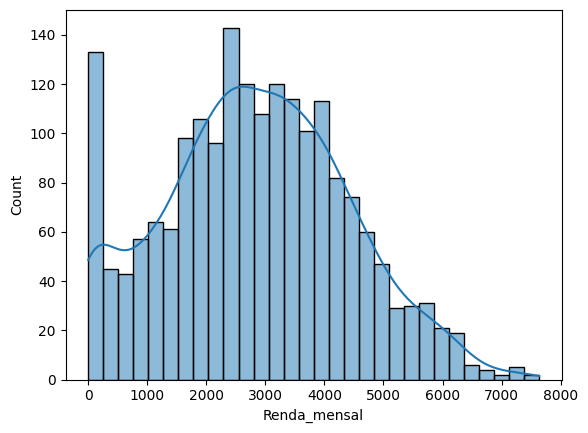

In [58]:
sns.histplot(df['Renda_mensal'], bins=30, kde=True)

In [35]:
# Mediana aplicada como imputa√ß√£o para casos em que renda mensal < 100, respeitando subgrupos de escolaridade

def substituir_por_mediana_grupo(x):
    mediana = x.median()
    return x.apply(lambda valor: mediana if valor < 100 else valor)

df['Renda_mensal'] = df.groupby('Escolaridade')['Renda_mensal'].transform(substituir_por_mediana_grupo)

In [36]:
display(df[df['Renda_mensal_original'] < 100][['Renda_mensal_original', 'Renda_mensal', 'Escolaridade']])

Renda_mensal_original  Renda_mensal   Escolaridade
17                    -1.00       2792.65  P√≥s-gradua√ß√£o
26                    -1.00       2698.48       superior
48                    -1.00       2792.65  P√≥s-gradua√ß√£o
70                    -1.00       2698.48       superior
77                    -1.00       2792.65  P√≥s-gradua√ß√£o
...                     ...           ...            ...
1928                -106.77        106.77          M√©dio
1938                 -95.83       2698.48       superior
1940                  -1.00       2956.80  N√£o informado
1969                  -1.00       2731.52       Superior
2007               -1244.17       1244.17  N√£o informado

[148 rows x 3 columns]

In [37]:
# Identificando idades menores que 18 anos 

df_idad_abaix_18 = df[df['Idade'] < 18]

display(df_idad_abaix_18)

Id  Idade           Sexo   Estado_civil  Renda_mensal   Escolaridade  \
13      14      6       Feminino         Casado        860.82       Superior   
19      20     13       Feminino     Divorciado        588.16  N√£o informado   
23      24     13       Feminino     Divorciado       1734.90  N√£o informado   
26      27     17  N√£o informado          Vi√∫vo       2698.48       superior   
35      36     16       Feminino     Divorciado       4747.99       superior   
...    ...    ...            ...            ...           ...            ...   
1956  1957      2  N√£o informado  N√£o informado       1342.91    Fundamental   
1981  1982     14      Masculino          Vi√∫vo       4750.81          M√©dio   
2000   675     13      Masculino          Vi√∫vo       3395.85       superior   
2003  1316     15      Masculino          Vi√∫vo       4963.70       Superior   
2004  1211     16       Feminino  N√£o informado       2915.92          M√©dio   

     Tem_filhos  N_filhos Trabalha        Regiao  ... Tipo_residencia  \
13          N√£o         0      Sim         Norte  ...          Outros   
19          N√£o         0      N√£o           Sul  ...          Cedido   
23          Sim         2      Sim           sul  ...         Alugada   
26          Sim         0      Sim  Centro-Oeste  ...         Pr√≥pria   
35          Sim         0      Sim  Centro-Oeste  ...          Outros   
...         ...       ...      ...           ...  ...             ...   
1956        Sim         3      Sim           sul  ...         Pr√≥pria   
1981        Sim         1      Sim       Sudeste  ...         Alugada   
2000        Sim         3      Sim       Sudeste  ...          Outros   
2003        N√£o         0      Sim  Centro-Oeste  ...          Outros   
2004        Sim         4      Sim           sul  ...         Pr√≥pria   

     Tempo_residencia_anos Meio_transporte  Frequenta_escola Usa_sus  \
13                     1.7   N√£o informado               Sim     Sim   
19                     0.2       Bicicleta               N√£o     Sim   
23                     6.0       Bicicleta               N√£o     Sim   
26                     7.8   N√£o informado               N√£o     Sim   
35                     4.8   N√£o informado               N√£o     Sim   
...                    ...             ...               ...     ...   
1956                   1.0       Bicicleta               N√£o     N√£o   
1981                   8.7          √înibus               N√£o     N√£o   
2000                   0.7   N√£o informado               N√£o     N√£o   
2003                   6.1   N√£o informado               N√£o     N√£o   
2004                   0.8           Carro               N√£o     N√£o   

     Problema_saude Nivel_satisfacao Comentarios  Incoerencia_trabalho_renda  \
13              N√£o              2.0     P√©ssimo                       False   
19              N√£o              4.0     Regular                       False   
23              N√£o              2.0     P√©ssimo                       False   
26              N√£o              1.0     Regular                        True   
35              N√£o              4.0   Excelente                       False   
...             ...              ...         ...                         ...   
1956            Sim              2.0     P√©ssimo                       False   
1981            N√£o              3.0     P√©ssimo                       False   
2000            N√£o              2.0   Excelente                       False   
2003            N√£o              1.0     Regular                       False   
2004            Sim              2.0   Excelente                       False   

     Renda_mensal_original  
13                  860.82  
19                  588.16  
23                 1734.90  
26                   -1.00  
35                 4747.99  
...                    ...  
1956               1342.91  
1981               4750.81  
2000               3395.85  
200

In [38]:
# Salvar coluna com valores originais e imputar mediana com base em subgrupos para valores abaixo de 18

df['Idade_original'] = df['Idade']
# (opcional) Imputar com mediana do grupo
# Marcar as idades inv√°lidas como NaN
df.loc[df['Idade'] < 18, 'Idade'] = pd.NA
# Imputar a mediana do grupo
df['Idade'] = df.groupby('Escolaridade')['Idade'].transform(lambda x: x.fillna(x.median()))

In [39]:
display(df[df['Idade_original'] < 18][['Idade_original', 'Idade', 'Escolaridade']])

Idade_original  Idade   Escolaridade
13                 6   38.0       Superior
19                13   36.0  N√£o informado
23                13   36.0  N√£o informado
26                17   37.0       superior
35                16   37.0       superior
...              ...    ...            ...
1956               2   39.0    Fundamental
1981              14   38.0          M√©dio
2000              13   37.0       superior
2003              15   38.0       Superior
2004              16   38.0          M√©dio

[205 rows x 3 columns]

In [40]:
df.isna().sum()

Id                            0
Idade                         0
Sexo                          0
Estado_civil                  0
Renda_mensal                  0
Escolaridade                  0
Tem_filhos                    0
N_filhos                      0
Trabalha                      0
Regiao                        0
Cidade                        0
Acesso_internet               0
Tipo_residencia               0
Tempo_residencia_anos         0
Meio_transporte               0
Frequenta_escola              0
Usa_sus                       0
Problema_saude                0
Nivel_satisfacao              0
Comentarios                   0
Incoerencia_trabalho_renda    0
Renda_mensal_original         0
Idade_original                0
dtype: int64

## 2 - An√°lise unidimensional e bidimensional das vari√°veis 

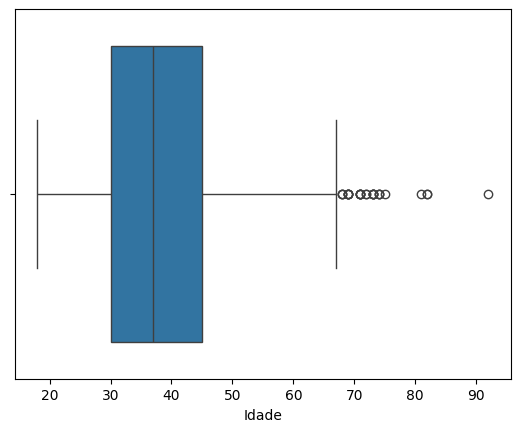

In [89]:
# Visualiza√ß√£o de vari√°veis

sns.boxplot(x='Idade', data=df)
plt.show()

<Axes: xlabel='Idade', ylabel='Count'>

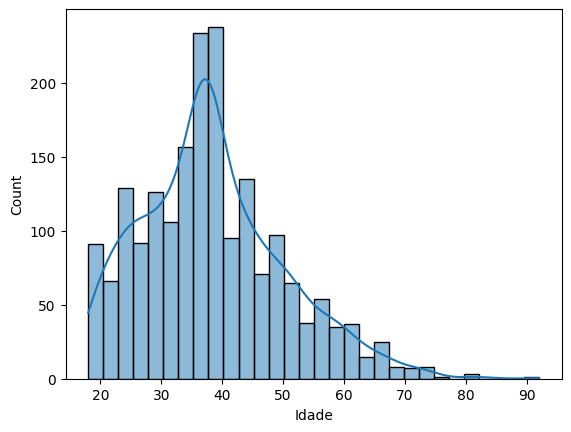

In [90]:
sns.histplot(df['Idade'], bins=30, kde=True)

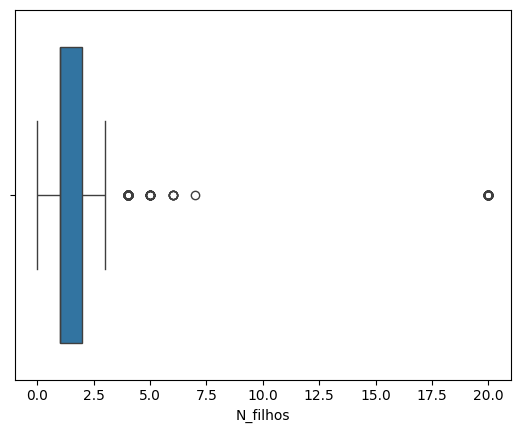

In [92]:
sns.boxplot(x='N_filhos', data=df)
plt.show()

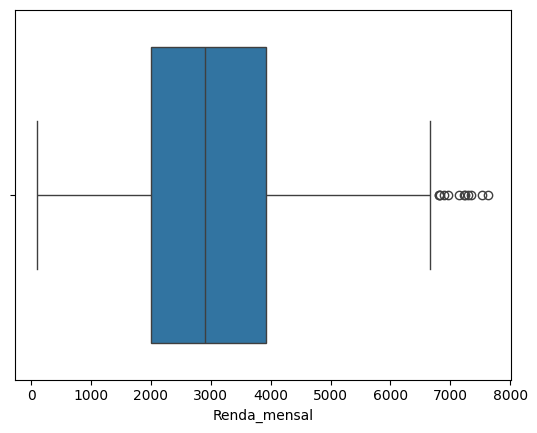

In [93]:
sns.boxplot(x='Renda_mensal', data=df)
plt.show()

<Axes: xlabel='Renda_mensal', ylabel='Count'>

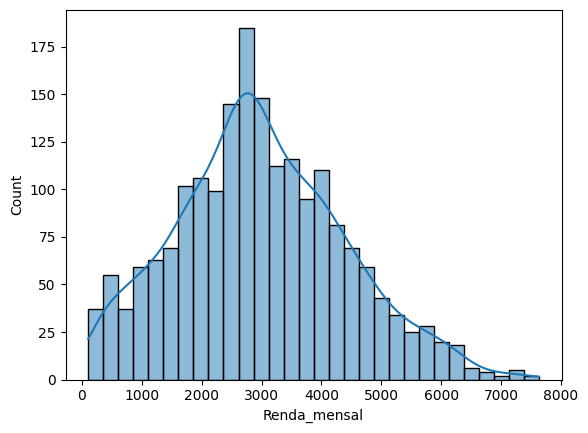

In [95]:
sns.histplot(df['Renda_mensal'], bins=30, kde=True)

<Axes: xlabel='Tempo_residencia_anos', ylabel='Count'>

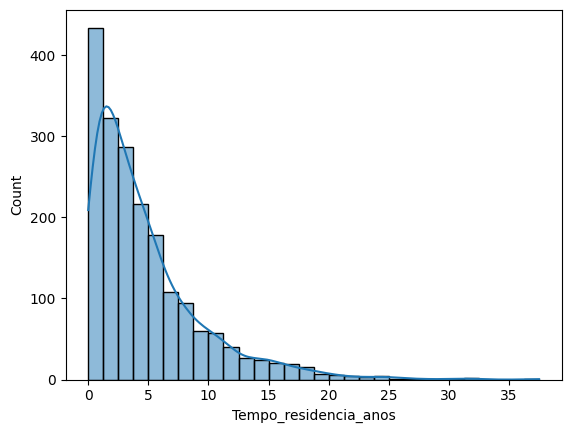

In [94]:
sns.histplot(df['Tempo_residencia_anos'], bins=30, kde=True)	

<Axes: xlabel='Nivel_satisfacao', ylabel='Count'>

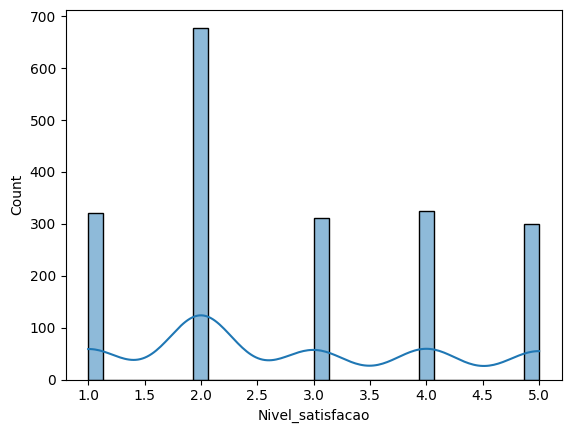

In [96]:
sns.histplot(df['Nivel_satisfacao'], bins=30, kde=True)	

<Axes: xlabel='Sexo', ylabel='Idade'>

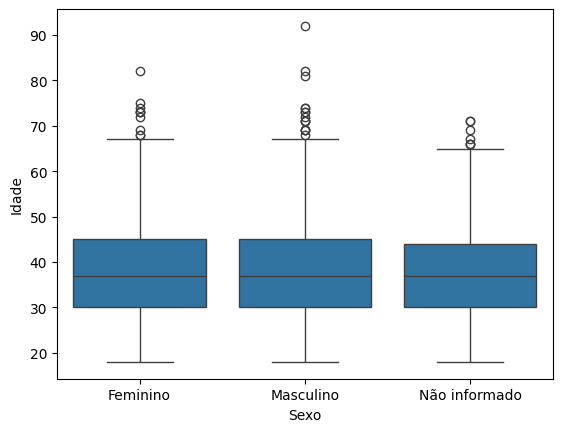

In [97]:
sns.boxplot(x=df['Sexo'], y=df['Idade'])

<Axes: xlabel='Renda_mensal', ylabel='Estado_civil'>

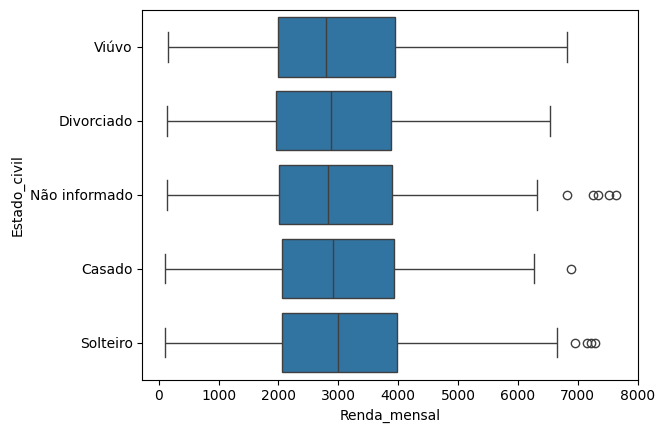

In [98]:
sns.boxplot(x=df['Renda_mensal'], y=df['Estado_civil'])

<Axes: xlabel='Renda_mensal', ylabel='Trabalha'>

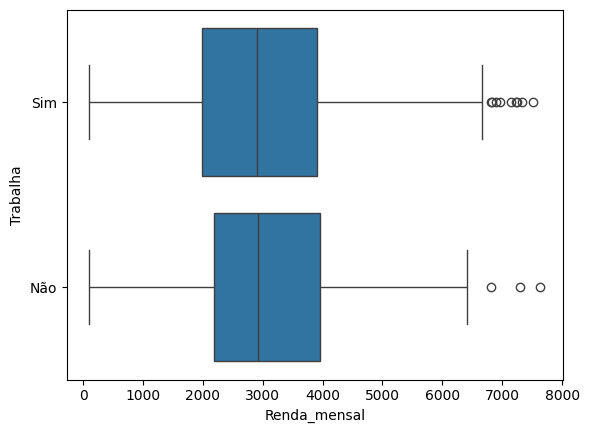

In [99]:
sns.boxplot(x=df['Renda_mensal'], y=df['Trabalha'])

<Axes: xlabel='Renda_mensal', ylabel='Regiao'>

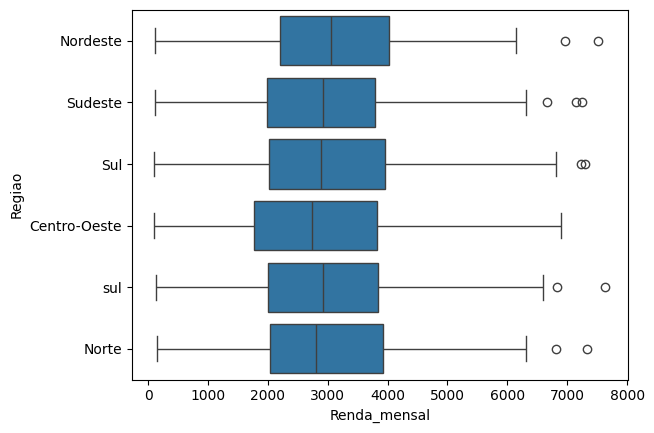

In [101]:
sns.boxplot(x=df['Renda_mensal'], y=df['Regiao'])

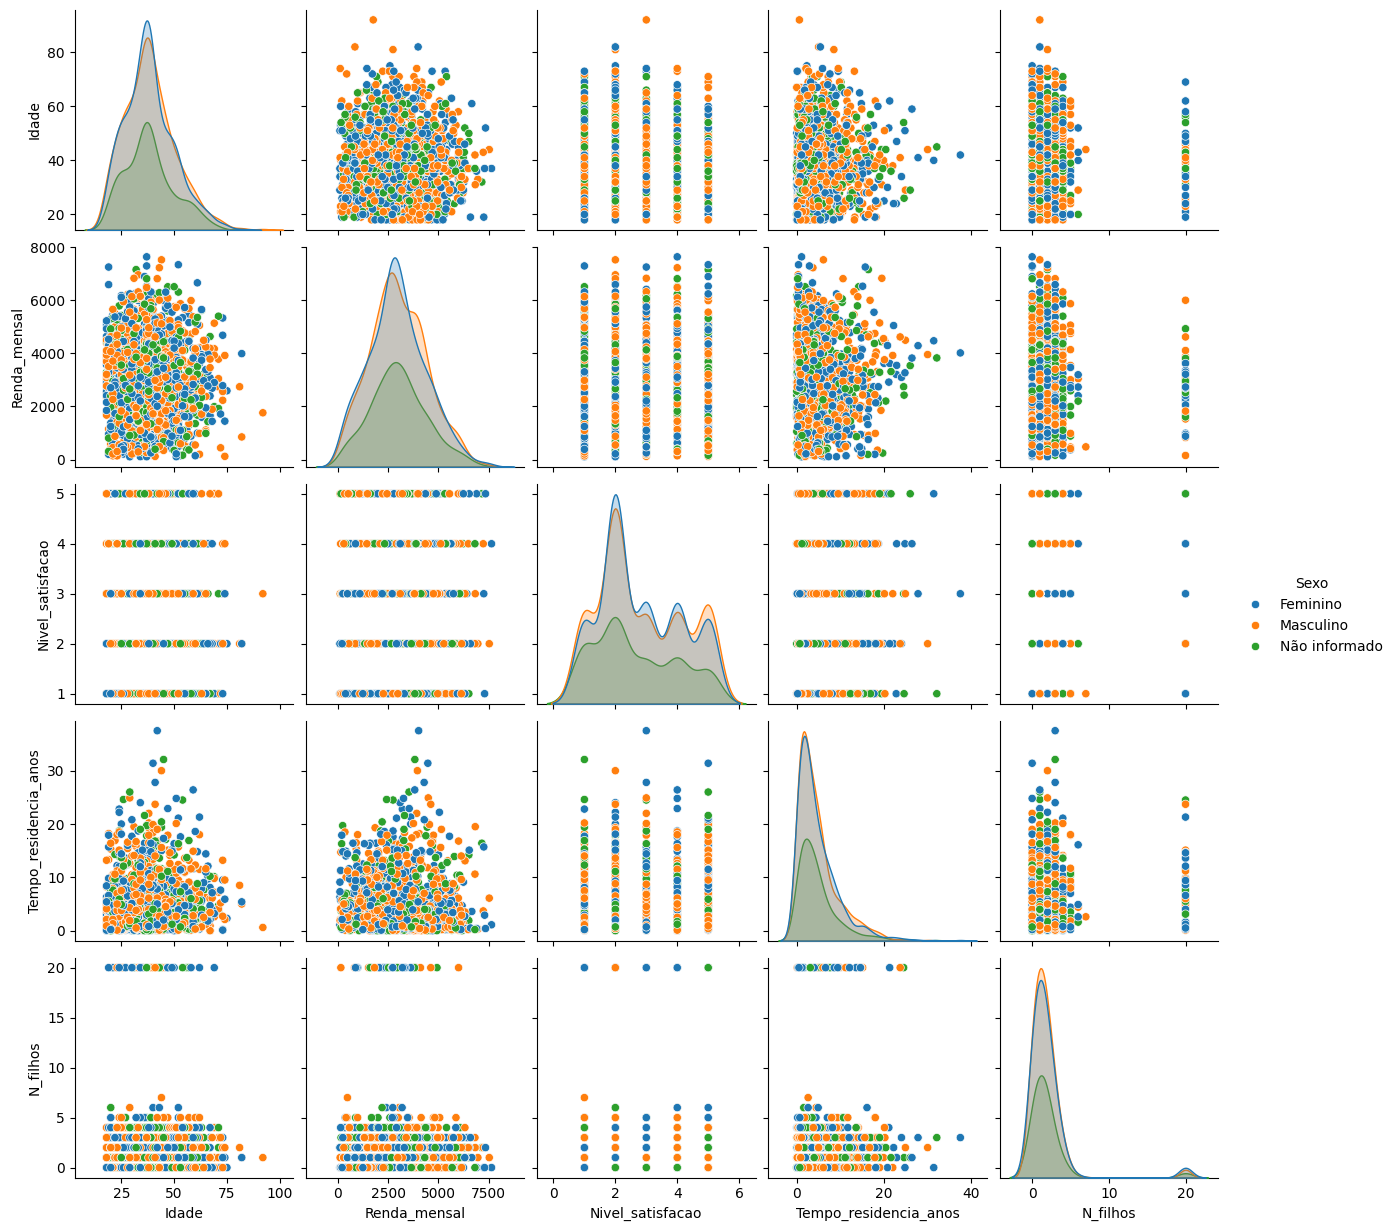

In [112]:
df_plot = df[['Idade', 'Renda_mensal', 'Nivel_satisfacao', 'Tempo_residencia_anos', 'N_filhos', 'Sexo']]
sns.pairplot(df_plot, hue='Sexo', diag_kind='kde')

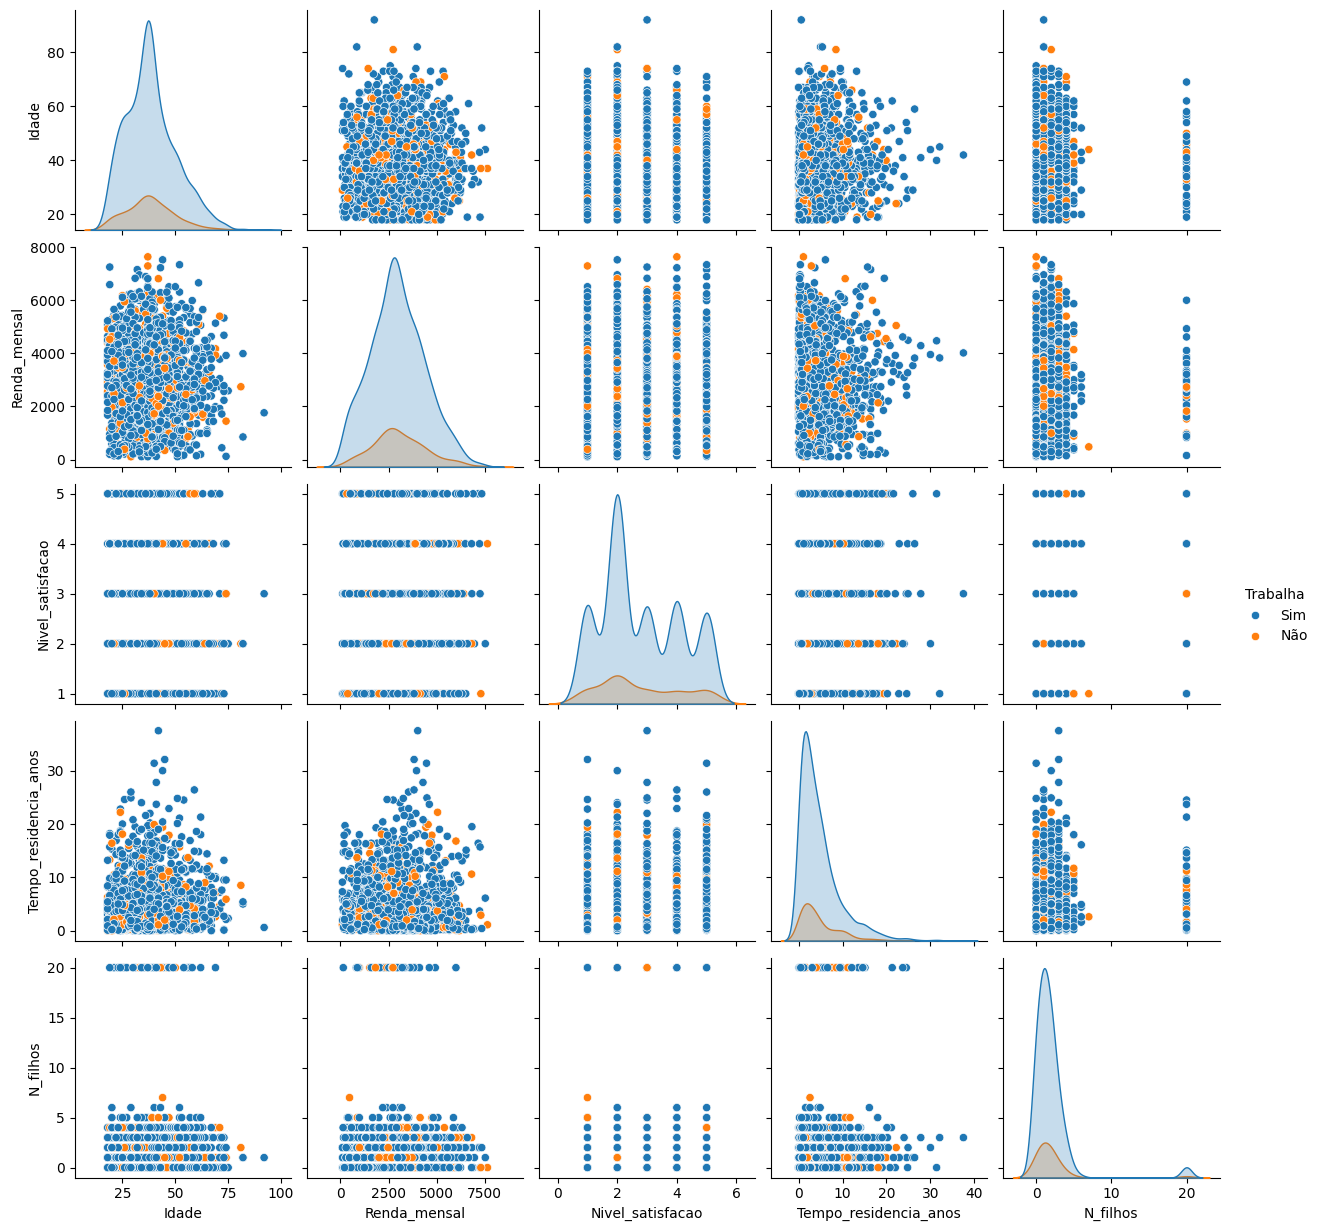

In [113]:
df_plot = df[['Idade', 'Renda_mensal', 'Nivel_satisfacao', 'Tempo_residencia_anos', 'N_filhos', 'Trabalha']]
sns.pairplot(df_plot, hue='Trabalha', diag_kind='kde')

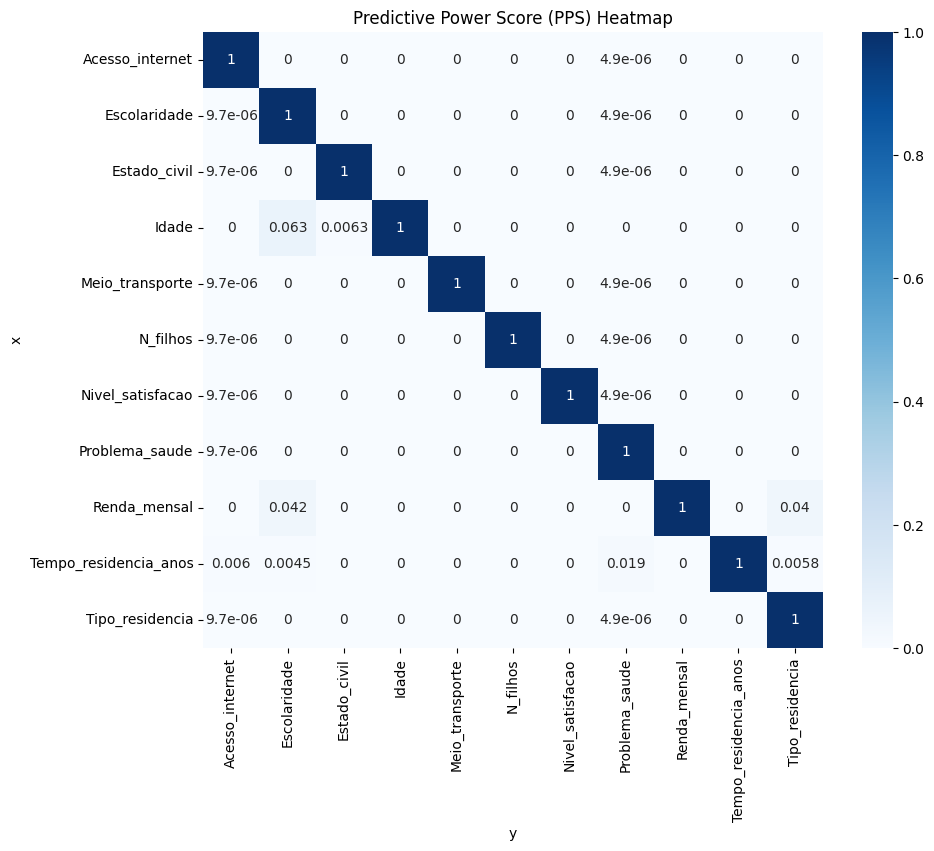

In [114]:
# Correla√ß√£o 
colunas_interesse = ['Idade', 'Renda_mensal', 'Nivel_satisfacao', 'Tempo_residencia_anos', 'N_filhos', 'Escolaridade', 'Estado_civil', 'Meio_transporte', 'Problema_saude', 'Acesso_internet', 'Tipo_residencia']
pps_matrix = pps.matrix(df[colunas_interesse])
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')
plt.figure(figsize=(10,8))
sns.heatmap(pps_pivot, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("Predictive Power Score (PPS) Heatmap")
plt.show();

A matriz de correla√ß√£o do Power Predict Score mostra que h√° uma correla√ß√£o leve entre idade e escolaridade, bem como renda mensal e escolaridade. Tamb√©m h√° uma correla√ß√£o leve entre tipo de resid√™ncia e renda mensal. QUando calculamos Pearson identificamos que tempo de resid√™ncia est√° levemente associado √† n√∫mero de filhos.  

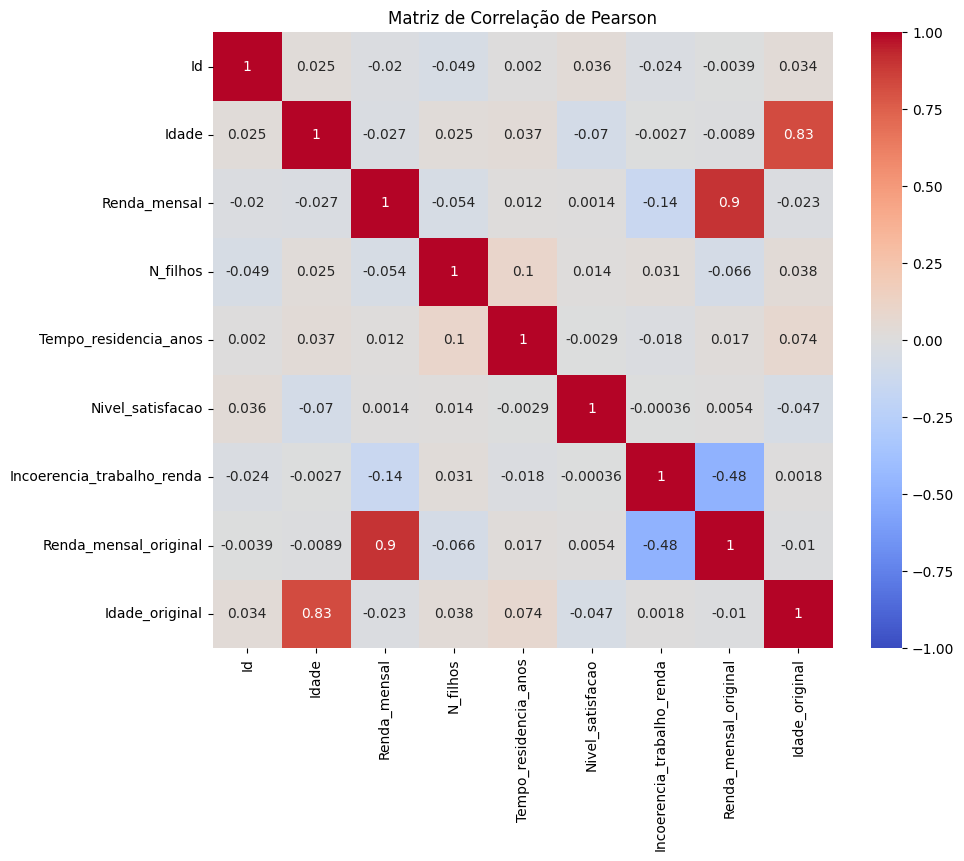

In [106]:
correlacao_pearson = df.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(correlacao_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correla√ß√£o de Pearson')
plt.show()

In [ ]:
sns.pairplot(df[['Idade', 'Renda_mensal', 'OutraVariavel']])

## 3 - Pr√©-processamento para modelagem 

Vamos criar um c√≥digo para construir uma vari√°vel nova com base na vari√°vel "Nivel de satisfacao". Criaremos uma classifica√ß√£o categ√≥rica (ordin√°ria) para esta nova coluna. Para isso, as defini√ß√µes de baixa, m√©dia e alta foram definidas em colabora√ß√£o com a equipe do projeto.


In [42]:
# Fun√ß√£o para criar nova vari√°vel
def classificar_satisfacao(nota):
    if nota <= 2:
        return 'Baixa'
    elif nota <= 4:
        return 'M√©dia'
    else:
        return 'Alta'

df['Satisfacao_cat'] = df['Nivel_satisfacao'].apply(classificar_satisfacao)


In [43]:
print(df['Satisfacao_cat'].value_counts())

Baixa    999
M√©dia    635
Alta     300
Name: Satisfacao_cat, dtype: int64


In [44]:
# Parcionamento em treino e teste

x = df[['Idade', 'Renda_mensal', 'Tempo_residencia_anos',
        'N_filhos', 'Sexo', 'Estado_civil', 'Escolaridade', 
        'Acesso_internet', 'Tipo_residencia', 'Meio_transporte', 
        'Frequenta_escola', 'Usa_sus', 'Problema_saude']]

y = df['Satisfacao_cat']

num_cols = ['Idade', 'Renda_mensal', 'Tempo_residencia_anos', 'N_filhos']

cat_cols = ['Sexo', 'Estado_civil', 'Escolaridade', 'Acesso_internet', 'Tipo_residencia',
            'Meio_transporte', 'Frequenta_escola', 'Usa_sus', 'Problema_saude']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
x_train

Idade  Renda_mensal  Tempo_residencia_anos  N_filhos           Sexo  \
776    24.0       1767.77                   12.0         1       Feminino   
1499   43.0       2698.48                   13.6         4  N√£o informado   
972    47.0       3443.34                    4.1         0       Feminino   
507    22.0       2792.65                    0.9         1      Masculino   
1322   33.0       1648.54                    3.9         0       Feminino   
...     ...           ...                    ...       ...            ...   
1174   23.0       2756.58                    9.7         1       Feminino   
1345   36.0       1476.56                    1.9         4      Masculino   
893    52.0       1988.38                    3.2         1       Feminino   
1516   57.0        361.27                    2.1         3  N√£o informado   
1170   46.0       2184.79                    1.2         1      Masculino   

       Estado_civil   Escolaridade Acesso_internet Tipo_residencia  \
776        Solteiro       superior             N√£o         Pr√≥pria   
1499         Casado       superior             Sim          Outros   
972        Solteiro    Fundamental             Sim         Pr√≥pria   
507      Divorciado  P√≥s-gradua√ß√£o             Sim         Alugada   
1322       Solteiro       Superior             Sim          Cedido   
...             ...            ...             ...             ...   
1174          Vi√∫vo       superior             Sim         Pr√≥pria   
1345          Vi√∫vo  N√£o informado             N√£o          Outros   
893   N√£o informado    Fundamental             N√£o          Cedido   
1516     Divorciado       superior             Sim          Outros   
1170     Divorciado    Fundamental             Sim          Cedido   

     Meio_transporte Frequenta_escola Usa_sus Problema_saude  
776           √înibus              Sim     N√£o            Sim  
1499           Carro              N√£o     Sim            Sim  
972        Bicicleta              N√£o     N√£o            N√£o  
507           √înibus              N√£o     Sim            N√£o  
1322          √înibus              N√£o     N√£o            N√£o  
...              ...              ...     ...            ...  
1174       Bicicleta              N√£o     N√£o            N√£o  
1345       Bicicleta              N√£o     Sim            N√£o  
893             A p√©              N√£o     N√£o            Sim  
1516            A p√©              N√£o     N√£o            N√£o  
1170   N√£o informado              Sim     Sim            Sim  

[1353 rows x 13 columns]

## 4 - Treinamento e teste do modelo 

In [46]:
# √Årvore de decis√£o 

from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Pr√©-processamento
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    # N√£o precisa do 'num' com scaler
], remainder='passthrough')  # Deixe passar as num√©ricas como est√£o

# Pipeline com √°rvore de decis√£o
pipeline_dt = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42))
])


In [47]:
x_train

Idade  Renda_mensal  Tempo_residencia_anos  N_filhos           Sexo  \
776    24.0       1767.77                   12.0         1       Feminino   
1499   43.0       2698.48                   13.6         4  N√£o informado   
972    47.0       3443.34                    4.1         0       Feminino   
507    22.0       2792.65                    0.9         1      Masculino   
1322   33.0       1648.54                    3.9         0       Feminino   
...     ...           ...                    ...       ...            ...   
1174   23.0       2756.58                    9.7         1       Feminino   
1345   36.0       1476.56                    1.9         4      Masculino   
893    52.0       1988.38                    3.2         1       Feminino   
1516   57.0        361.27                    2.1         3  N√£o informado   
1170   46.0       2184.79                    1.2         1      Masculino   

       Estado_civil   Escolaridade Acesso_internet Tipo_residencia  \
776        Solteiro       superior             N√£o         Pr√≥pria   
1499         Casado       superior             Sim          Outros   
972        Solteiro    Fundamental             Sim         Pr√≥pria   
507      Divorciado  P√≥s-gradua√ß√£o             Sim         Alugada   
1322       Solteiro       Superior             Sim          Cedido   
...             ...            ...             ...             ...   
1174          Vi√∫vo       superior             Sim         Pr√≥pria   
1345          Vi√∫vo  N√£o informado             N√£o          Outros   
893   N√£o informado    Fundamental             N√£o          Cedido   
1516     Divorciado       superior             Sim          Outros   
1170     Divorciado    Fundamental             Sim          Cedido   

     Meio_transporte Frequenta_escola Usa_sus Problema_saude  
776           √înibus              Sim     N√£o            Sim  
1499           Carro              N√£o     Sim            Sim  
972        Bicicleta              N√£o     N√£o            N√£o  
507           √înibus              N√£o     Sim            N√£o  
1322          √înibus              N√£o     N√£o            N√£o  
...              ...              ...     ...            ...  
1174       Bicicleta              N√£o     N√£o            N√£o  
1345       Bicicleta              N√£o     Sim            N√£o  
893             A p√©              N√£o     N√£o            Sim  
1516            A p√©              N√£o     N√£o            N√£o  
1170   N√£o informado              Sim     Sim            Sim  

[1353 rows x 13 columns]

In [48]:
pipeline_dt.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sexo', 'Estado_civil',
                                                   'Escolaridade',
                                                   'Acesso_internet',
                                                   'Tipo_residencia',
                                                   'Meio_transporte',
                                                   'Frequenta_escola',
                                                   'Usa_sus',
                                                   'Problema_saude'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_split=10,
                                        random_state=42))])

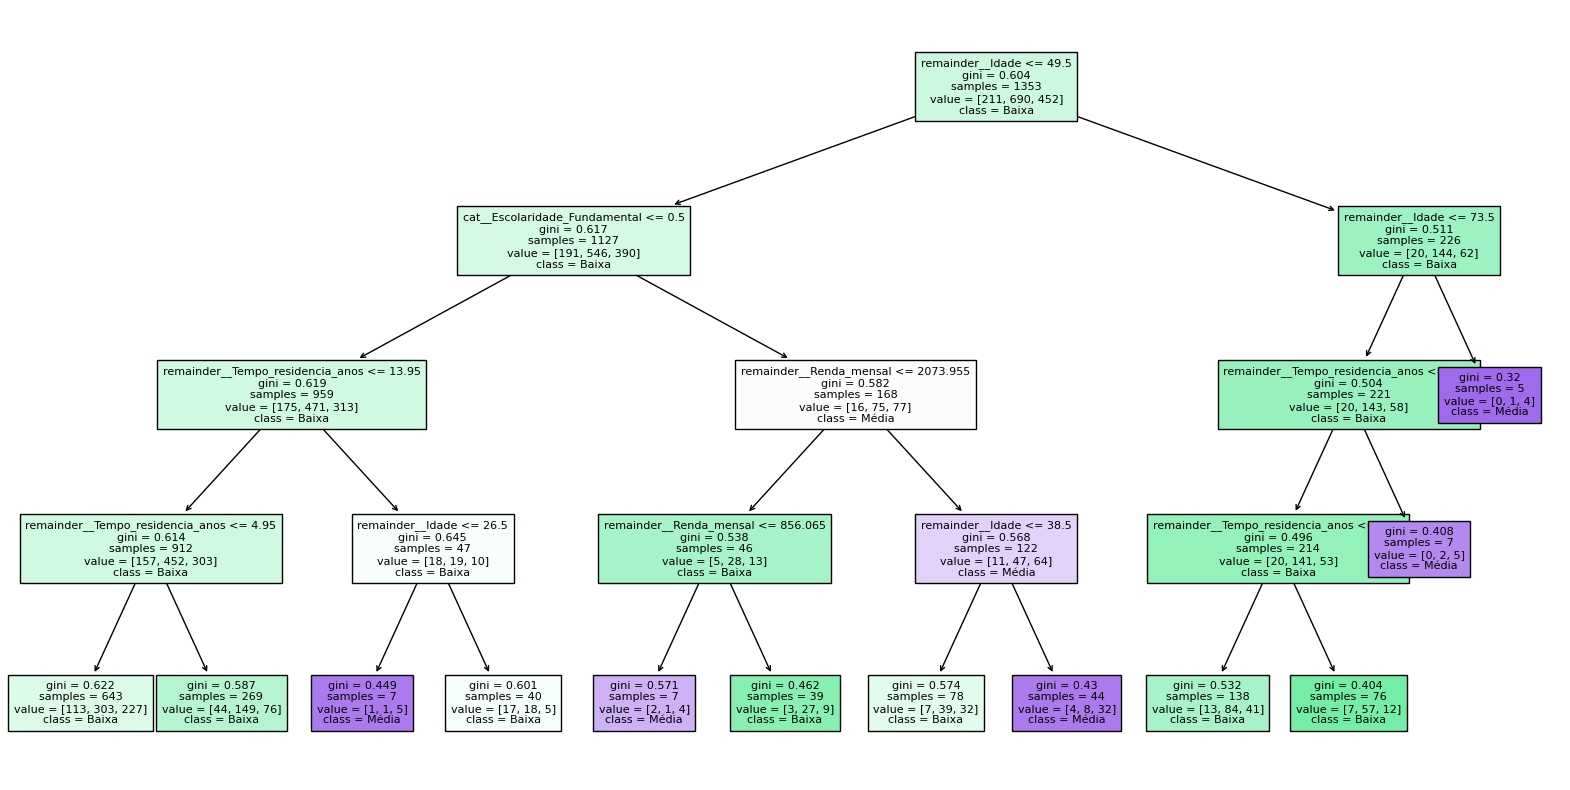

In [49]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extraia o modelo j√° treinado
modelo_ajustado = pipeline_dt.named_steps['model']

plt.figure(figsize=(20,10))
tree.plot_tree(modelo_ajustado, filled=True, feature_names=pipeline_dt.named_steps['preprocess'].get_feature_names_out(), class_names=pipeline_dt.classes_, fontsize=8)
plt.show()

## 5 - An√°lise de desempenho do modelo 

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Previs√µes
y_pred = pipeline_dt.predict(x_test)
y_proba = pipeline_dt.predict_proba(x_test)

# Acur√°cia
print("Acur√°cia:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

Acur√°cia: 0.5077452667814114
Precision (macro): 0.2792026731190229
Recall (macro): 0.3308575167559729
F1-score (macro): 0.26957513544339895


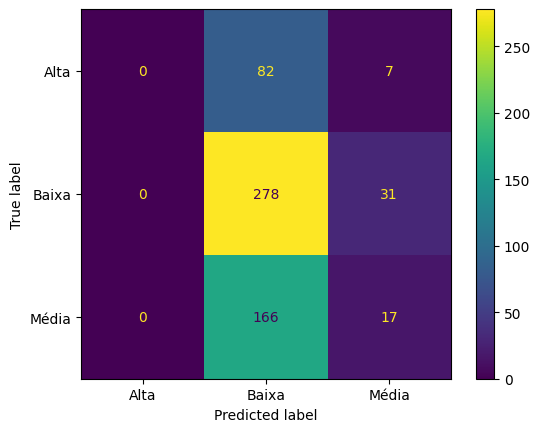

In [51]:
# Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred, labels=pipeline_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_dt.classes_)
disp.plot()
plt.show()

In [171]:
# ROC-AUC (para multiclasse)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print("ROC-AUC (macro):", roc_auc)

ROC-AUC (macro): 0.5084367149246699


## 6 - Solu√ß√µes para aprimoramento do modelo 

In [83]:
# Modelo Baseline - Random Forest 
# Crie o pipeline sem oversampling
pipeline_rf_puro = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Treine
pipeline_rf_puro.fit(x_train, y_train)

# Previs√µes
y_pred_puro = pipeline_rf_puro.predict(x_test)

# Avalia√ß√£o
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("== Random Forest sem balanceamento ==")
print("Acur√°cia:", accuracy_score(y_test, y_pred_puro))
print("F1 macro:", f1_score(y_test, y_pred_puro, average='macro'))
print("\nRelat√≥rio:\n", classification_report(y_test, y_pred_puro))

== Random Forest sem balanceamento ==
Acur√°cia: 0.4939759036144578
F1 macro: 0.2987745810780809

Relat√≥rio:
               precision    recall  f1-score   support

        Alta       0.12      0.01      0.02        89
       Baixa       0.53      0.82      0.65       309
       M√©dia       0.33      0.17      0.23       183

    accuracy                           0.49       581
   macro avg       0.33      0.34      0.30       581
weighted avg       0.41      0.49      0.42       581



In [60]:
# Compara√ß√£o de Random Oversampling e SMOTE (t√©cnicas de oversampling)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 'not majority', random_state=42)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [61]:
# Ver propor√ß√£o

print(y_train_ros.value_counts(normalize=True))  # propor√ß√£o em %
print(y_train_ros.value_counts())               # contagem absoluta

M√©dia    0.333333
Alta     0.333333
Baixa    0.333333
Name: Satisfacao_cat, dtype: float64
M√©dia    690
Alta     690
Baixa    690
Name: Satisfacao_cat, dtype: int64


In [58]:
print(df['Satisfacao_cat'].value_counts())

Baixa    999
M√©dia    635
Alta     300
Name: Satisfacao_cat, dtype: int64


In [66]:
# Transformar vari√°veis em dummy (obrigat√≥rio para Random Forest) + Oversample (not minority) + Treinar no modelo Random Forest
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sexo', 'Estado_civil',
                                                   'Escolaridade',
                                                   'Acesso_internet',
                                                   'Tipo_residencia',
                                                   'Meio_transporte',
                                                   'Frequenta_escola',
                                                   'Usa_sus',
                                                   'Problema_saude'])])),
                ('oversample', RandomOverSampler(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [67]:
# Avaliar m√©tricas de desempenho

print("== Random Oversampling ==")
print("Acur√°cia:", accuracy_score(y_test, y_pred))
print("F1 macro:", f1_score(y_test, y_pred, average='macro'))
print("\nRelat√≥rio:\n", classification_report(y_test, y_pred))

== Random Oversampling ==
Acur√°cia: 0.5077452667814114
F1 macro: 0.26957513544339895

Relat√≥rio:
               precision    recall  f1-score   support

        Alta       0.00      0.00      0.00        89
       Baixa       0.53      0.90      0.67       309
       M√©dia       0.31      0.09      0.14       183

    accuracy                           0.51       581
   macro avg       0.28      0.33      0.27       581
weighted avg       0.38      0.51      0.40       581



In [68]:
print(y_train.value_counts())

Baixa    690
M√©dia    452
Alta     211
Name: Satisfacao_cat, dtype: int64


In [69]:
# Compara√ß√£o com desempenho baseline

# Acur√°cia
print("Acur√°cia:", accuracy_score(y_test, y_pred))
# Precision, Recall, F1
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

Acur√°cia: 0.5077452667814114
Precision (macro): 0.2792026731190229
Recall (macro): 0.3308575167559729
F1-score (macro): 0.26957513544339895


In [72]:
# SMOTE Oversampling 

#Oversample (not minority) + Treinar no modelo Random Forest

pipeline_smote = Pipeline([
    ('preprocess', preprocessor),
    ('oversample', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline_smote.fit(x_train, y_train)

y_pred_smote = pipeline_smote.predict(x_test)

In [73]:
# Avaliar m√©tricas de desempenho

print("Acur√°cia:", accuracy_score(y_test, y_pred_smote))
print("F1 macro:", f1_score(y_test, y_pred_smote, average='macro'))
print("\nRelat√≥rio:\n", classification_report(y_test, y_pred_smote))

Acur√°cia: 0.49225473321858865
F1 macro: 0.3289271458546821

Relat√≥rio:
               precision    recall  f1-score   support

        Alta       0.19      0.06      0.09        89
       Baixa       0.55      0.79      0.65       309
       M√©dia       0.32      0.20      0.25       183

    accuracy                           0.49       581
   macro avg       0.36      0.35      0.33       581
weighted avg       0.43      0.49      0.44       581



Testei o modelo Random Forest combinado com t√©cnicas de oversampling (mais aplic√°vel para datasets menores). Apliquei Random Oversampling e SMOTE. Os conjuntos de dados oversampled foram aplicados no Random Forest e as m√©tricas de desempenho foram comparadas. SMOTE melhorou um pouco a predi√ß√£o das classes minorit√°rias, mas ainda n√£o tornou o modelo bom o suficiente. 

In [77]:
importances = pipeline_smote.named_steps['model'].feature_importances_
features = pipeline_smote.named_steps['preprocess'].get_feature_names_out()

import pandas as pd
df_imp = pd.DataFrame({'feature': features, 'importance': importances})
print(df_imp.sort_values(by='importance', ascending=False).head(10))

                             feature  importance
32           remainder__Renda_mensal    0.096141
33  remainder__Tempo_residencia_anos    0.090604
31                  remainder__Idade    0.089723
34               remainder__N_filhos    0.057448
3           cat__Estado_civil_Casado    0.030703
18       cat__Tipo_residencia_Outros    0.028250
1                cat__Sexo_Masculino    0.027251
11   cat__Escolaridade_P√≥s-gradua√ß√£o    0.026800
0                 cat__Sexo_Feminino    0.026218
24       cat__Meio_transporte_√înibus    0.026169


In [81]:
# Uso do Balanced Random Forest 

from imblearn.ensemble import BalancedRandomForestClassifier

pipeline_bal_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', BalancedRandomForestClassifier(random_state=42))
])

pipeline_bal_rf.fit(x_train, y_train)
y_pred_bal_rf = pipeline_bal_rf.predict(x_test)

print("Acur√°cia:", accuracy_score(y_test, y_pred_bal_rf))
print("F1 macro:", f1_score(y_test, y_pred_bal_rf, average='macro'))
print("\nRelat√≥rio:\n", classification_report(y_test, y_pred_bal_rf))

Acur√°cia: 0.3253012048192771
F1 macro: 0.3037997204219088

Relat√≥rio:
               precision    recall  f1-score   support

        Alta       0.15      0.31      0.20        89
       Baixa       0.51      0.34      0.41       309
       M√©dia       0.30      0.30      0.30       183

    accuracy                           0.33       581
   macro avg       0.32      0.32      0.30       581
weighted avg       0.39      0.33      0.34       581



In [84]:
# Compara√ß√£o com baseline 

print("== Random Forest sem balanceamento ==")
print("Acur√°cia:", accuracy_score(y_test, y_pred_puro))
print("F1 macro:", f1_score(y_test, y_pred_puro, average='macro'))
print("\nRelat√≥rio:\n", classification_report(y_test, y_pred_puro))

== Random Forest sem balanceamento ==
Acur√°cia: 0.4939759036144578
F1 macro: 0.2987745810780809

Relat√≥rio:
               precision    recall  f1-score   support

        Alta       0.12      0.01      0.02        89
       Baixa       0.53      0.82      0.65       309
       M√©dia       0.33      0.17      0.23       183

    accuracy                           0.49       581
   macro avg       0.33      0.34      0.30       581
weighted avg       0.41      0.49      0.42       581



## 7 - Conclus√£o 

### üéØ Contexto

Neste projeto, desenvolvemos um modelo para prever a satisfa√ß√£o (Baixa, M√©dia, Alta) de benefici√°rios com base em dados sociodemogr√°ficos.  
O principal desafio enfrentado foi o desbalanceamento das classes, em que a classe *Baixa* predominava no dataset.

---

### üõ†Ô∏è Modelos Testados

Foram testadas as seguintes abordagens:

- **Random Forest Puro**: modelo sem balanceamento ou oversampling.
- **Random Forest + SMOTE**: modelo com gera√ß√£o de amostras sint√©ticas da minoria.
- **Balanced Random Forest**: modelo com balanceamento interno nas √°rvores.

---

### üìä Resultados Comparativos


| Modelo                     | Acur√°cia | F1 macro | Recall Alta | Recall M√©dia | Recall Baixa |
| -------------------------- | -------- | -------- | ----------- | ------------ | ------------ |
| Random Forest Puro         | \~50%+   | \~0.25   | \~0%        | muito baixo  | muito alto   |
| Random Forest + SMOTE      | \~49%    | \~0.33   | 6%          | 20%          | 79%          |
| Random Forest + Oversample | \~51%    | \~0.27   | 0%          | 9%           | 90%          |
| Balanced Random Forest     | \~32%    | \~0.30   | 31%         | 30%          | 34%          |

---

### üìù Avalia√ß√£o Final

‚úÖ **Balanced Random Forest foi a melhor solu√ß√£o testada**:
- Melhorou substancialmente o recall da classe *Alta* (31%) e *M√©dia* (30%) em compara√ß√£o com os outros modelos.
- Sacrificou acur√°cia geral (32%), o que √© esperado ao priorizar o balanceamento entre as classes.
- Gerou um modelo mais justo para an√°lise e tomada de decis√£o em contextos onde minorias s√£o relevantes.

‚ö† **Trade-off importante**:
- O modelo n√£o maximiza acur√°cia geral, mas proporciona previs√µes mais equilibradas entre as classes, atendendo ao objetivo de identificar padr√µes em *Alta* e *M√©dia*.

---

### üîç Import√¢ncia das Vari√°veis (Feature Importance)

(Opcional: inserir tabela ou gr√°fico gerado do modelo mostrando as vari√°veis mais importantes para a predi√ß√£o)

---

### Pr√≥ximos Passos

- **Ajustar hiperpar√¢metros** do Balanced Random Forest (ex.: max_depth, n_estimators) para refinar o modelo.
- **Testar Gradient Boosting** com `sample_weight` para comparar desempenho.
- **Aplicar o modelo em dados novos** para prever satisfa√ß√£o em surveys anteriores que n√£o mediram satisfa√ß√£o.
- **Comunicar as limita√ß√µes**: as predi√ß√µes s√£o infer√™ncias baseadas nos dados e n√£o substituem a coleta direta da satisfa√ß√£o.

---

### üìå Conclus√£o

O Balanced Random Forest se mostrou a melhor alternativa para o desafio proposto, equilibrando as predi√ß√µes entre as classes de satisfa√ß√£o e oferecendo um ponto de partida s√≥lido para an√°lises e aplica√ß√µes pr√°ticas no contexto do survey.

